In [1]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
import seaborn as sns

In [2]:
housing = pd.read_csv('./data/housing.csv')

In [3]:
transformer = ColumnTransformer(transformers=[
    ('imputer', SimpleImputer(strategy='mean'), ['total_bedrooms']),
    ('one_hot', OneHotEncoder(), ['ocean_proximity']),
], remainder='passthrough')

transformed = transformer.fit_transform(housing)
housing = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
housing

imputer__total_bedrooms  one_hot__ocean_proximity_<1H OCEAN  \
0                        129.0                                 0.0   
1                       1106.0                                 0.0   
2                        190.0                                 0.0   
3                        235.0                                 0.0   
4                        280.0                                 0.0   
...                        ...                                 ...   
20635                    374.0                                 0.0   
20636                    150.0                                 0.0   
20637                    485.0                                 0.0   
20638                    409.0                                 0.0   
20639                    616.0                                 0.0   

       one_hot__ocean_proximity_INLAND  one_hot__ocean_proximity_ISLAND  \
0                                  0.0                              0.0   
1                                  0.0                              0.0   
2                                  0.0                              0.0   
3                                  0.0                              0.0   
4                                  0.0                              0.0   
...                                ...                              ...   
20635                              1.0                              0.0   
20636                              1.0                              0.0   
20637                              1.0                              0.0   
20638                              1.0                              0.0   
20639                              1.0                              0.0   

       one_hot__ocean_proximity_NEAR BAY  one_hot__ocean_proximity_NEAR OCEAN  \
0                                    1.0                                  0.0   
1                                    1.0                                  0.0   
2                                    1.0                                  0.0   
3                                    1.0                                  0.0   
4                                    1.0                                  0.0   
...                                  ...                                  ...   
20635                                0.0                                  0.0   
20636                                0.0                                  0.0   
20637                                0.0                                  0.0   
20638                                0.0                                  0.0   
20639                                0.0                                  0.0   

       remainder__longitude  remainder__latitude  \
0                   -122.23                37.88   
1                   -122.22                37.86   
2                   -122.24                37.85   
3                   -122.25                37.85   
4                   -122.25                37.85   
...                     ...                  ...   
20635               -121.09                39.48   
20636               -121.21                39.49   
20637               -121.22                39.43   
20638               -121.32                39.43   
20639               -121.24                39.37   

       remainder__housing_median_age  remainder__total_rooms  \
0                               41.0                   880.0   
1                               21.0                  7099.0   
2                               52.0                  1467.0   
3                               52.0                  1274.0   
4                               52.0                  1627.0   
...                              ...                     ...   
20635                           25.0                  1665.0   
20636                           18.0                   697.0   
20637                           17.0                  2254.0   
20638                      

In [4]:
X = housing.drop(columns='remainder__median_house_value')
y = housing.remainder__median_house_value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Decision Trees

![data](./assets/tree-regressor-data.png)
![data](./assets/tree-regressor.png)
[???](https://madhureshgupta.home.blog/2020/05/17/how-decision-trees-work/)

In [6]:
def calc_error(model, y_true):
    predictions = model.predict(X_test)
    error = mean_squared_error(y_true=y_true, y_pred=predictions)
    return np.sqrt(error)

In [9]:
tree = DecisionTreeRegressor(max_depth=2, max_features=5)
tree.fit(X_train, y_train)
calc_error(tree, y_test)

105770.07499108317

In [11]:
X.columns

Index(['imputer__total_bedrooms', 'one_hot__ocean_proximity_<1H OCEAN',
       'one_hot__ocean_proximity_INLAND', 'one_hot__ocean_proximity_ISLAND',
       'one_hot__ocean_proximity_NEAR BAY',
       'one_hot__ocean_proximity_NEAR OCEAN', 'remainder__longitude',
       'remainder__latitude', 'remainder__housing_median_age',
       'remainder__total_rooms', 'remainder__population',
       'remainder__households', 'remainder__median_income'],
      dtype='object')

[Text(0.5, 0.8333333333333334, 'x[1] <= 0.5\nsquared_error = 13367782117.894\nsamples = 16512\nvalue = 207194.694'),
 Text(0.25, 0.5, 'x[6] <= -121.865\nsquared_error = 13330992442.021\nsamples = 9171\nvalue = 180450.272'),
 Text(0.125, 0.16666666666666666, 'squared_error = 16468217022.507\nsamples = 2960\nvalue = 243458.355'),
 Text(0.375, 0.16666666666666666, 'squared_error = 9042185525.211\nsamples = 6211\nvalue = 150422.27'),
 Text(0.75, 0.5, 'x[8] <= 50.5\nsquared_error = 11403852648.604\nsamples = 7341\nvalue = 240606.094'),
 Text(0.625, 0.16666666666666666, 'squared_error = 10981383246.293\nsamples = 7060\nvalue = 238374.29'),
 Text(0.875, 0.16666666666666666, 'squared_error = 18748872757.667\nsamples = 281\nvalue = 296679.185')]

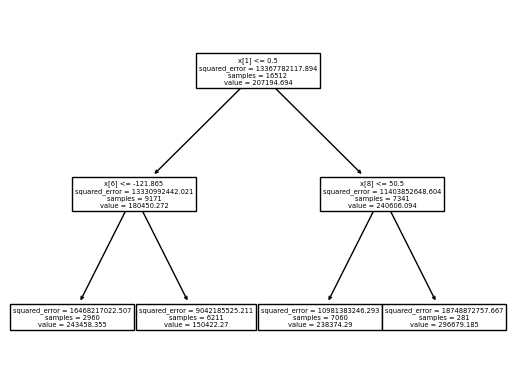

In [10]:
plot_tree(tree)

### Random Forest

* Trainiert viele Decision Trees mit jeweils zufälligen mixes von features
* Prediction ist das mean der Einzelpredictions
* Einzigartig: *feature importances*
* einer der besten klassischen Algorithmen

In [13]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
calc_error(forest, y_test)

48811.20122296984

In [14]:
pd.Series(forest.feature_importances_, index=X.columns).sort_values(ascending=False)

remainder__median_income               0.490390
one_hot__ocean_proximity_INLAND        0.141556
remainder__longitude                   0.105962
remainder__latitude                    0.101893
remainder__housing_median_age          0.051938
remainder__population                  0.032165
remainder__total_rooms                 0.023907
imputer__total_bedrooms                0.023196
remainder__households                  0.018055
one_hot__ocean_proximity_NEAR OCEAN    0.006335
one_hot__ocean_proximity_<1H OCEAN     0.003436
one_hot__ocean_proximity_NEAR BAY      0.000866
one_hot__ocean_proximity_ISLAND        0.000301
dtype: float64

### Support Vector Machine

* Mathe-Endgegner
* einer der besten klassischen Algorithmen

In [31]:
svr = SVR()
svr.fit(X_train, y_train)
calc_error(svr, y_test)

117229.21988085858

In [35]:
search = GridSearchCV(estimator=SVR(),
                      param_grid={'kernel': ['rbf', 'linear'],
                                  'C': [1e1 - 1, 1e-2]},
                      scoring='neg_mean_squared_error')
search.fit(X_train, y_train)
search.best_score_

-5440960168.745267